In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from matplotlib import pyplot as plt

# Statistical Visualizations Practice with Seaborn

# Literacy rate, adult total (% of people ages 15 and above)

data from <br/>
https://data.worldbank.org/indicator/SE.ADT.LITR.ZS

In [62]:
# API_SE.ADT.LITR.ZS_DS2_en_csv_v2_37553.csv

In [63]:
# note the first 4 lines of the csv aren't part of the data, so skip them
literacy_rate_df = pd.read_csv("data/API_SE.ADT.LITR.ZS_DS2_en_csv_v2_37553.csv", skiprows=4)

In [64]:
literacy_rate_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.989998,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,71.105171,71.029984,71.495399,72.658661,72.855759,72.638908,72.981560,73.275108,NaN,NaN
2,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,55.465778,56.472198,59.747349,59.553669,59.703239,60.007320,60.290852,60.505550,NaN,NaN
4,Angola,AGO,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.400002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.737244,87.000000,NaN,95.000000,NaN,90.000000,NaN,NaN,NaN,NaN
264,Zambia,ZMB,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71.132301,NaN,87.500000,NaN,NaN,NaN,NaN,NaN


In [65]:
literacy_rate_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

# the latest year we have data for is in 2023, so I'll use that year

In [66]:
literacy_rate_df[['2023']]

,2023
0,NaN
1,73.275108
2,NaN
3,60.505550
4,NaN
...,...
261,NaN
262,NaN
263,NaN
264,NaN


In [67]:
# seaborn histogram documentation
# https://seaborn.pydata.org/generated/seaborn.histplot.html

In [68]:
lit_rate_2023_df = literacy_rate_df['2023']

In [69]:
lit_rate_2023_df

0            NaN
1      73.275108
2            NaN
3      60.505550
4            NaN
         ...    
261          NaN
262          NaN
263          NaN
264          NaN
265          NaN
Name: 2023, Length: 266, dtype: float64

In [70]:
# remote nan values with numpy
temp = lit_rate_2023_df.values
non_nan_mask = ~np.isnan(temp)
clean_data = temp[non_nan_mask]

In [71]:
clean_data

array([ 73.27510834,  60.50555038,  76.15425873, 100.        ,
        98.        ,  96.67762756,  81.49595642,  96.43048859,
        98.99172211,  98.68871307,  65.85257721,  65.92082977,
        90.09896851,  85.35204315,  69.51500702,  67.8960495 ,
        70.30046082,  77.        ,  95.        ,  94.54627228,
        94.79000854,  67.71456909,  63.03852844,  77.63182068,
        85.17915344,  96.80445862,  80.94914246,  87.22839355,
        78.25939178,  86.25975037,  65.57189941,  75.0088501 ,
        90.        ,  68.19297791,  68.19624329,  87.28028107,
        96.63619232,  99.38118744,  94.70938873,  78.04084015,
        75.0088501 ,  68.19624329,  95.61952209,  87.35600281])

In [74]:
np.min(clean_data)

np.float64(60.5055503845215)

In [ ]:
# 60.5055503845215 is the lowest literacy rate for which we have data

# Now Practice Making Statistical Visualizations

# Histogram

Text(0.5, 1.0, "Histogram of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

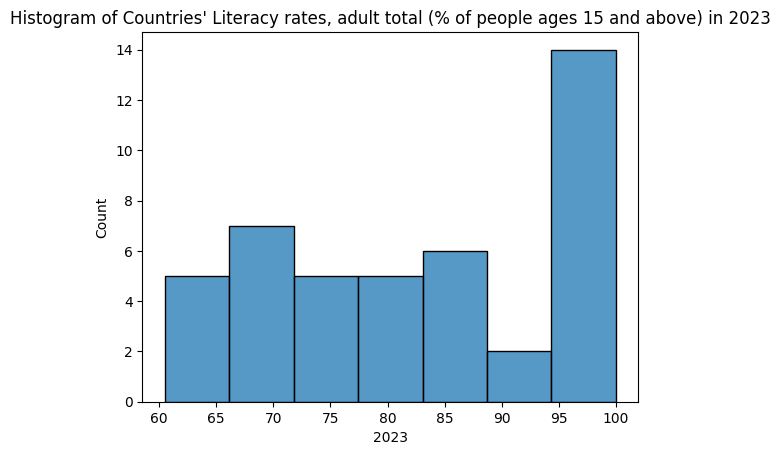

In [73]:
ax = sns.histplot(data=literacy_rate_df, x="2023")
ax.set_title("Histogram of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

# Boxplot

In [ ]:
# seaborn boxplot documentation
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 1.0, "Box plot of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

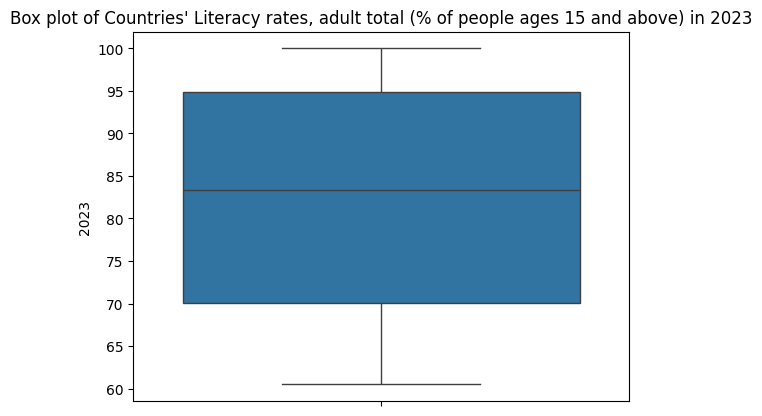

In [31]:
ax = sns.boxplot(data=literacy_rate_df, y="2023")
ax.set_title("Box plot of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

# rug plot with kde plot

https://seaborn.pydata.org/generated/seaborn.rugplot.html <br/>
"Plot marginal distributions by drawing ticks along the x and y axes.<br/>
This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way"

(60.0, 100.0)

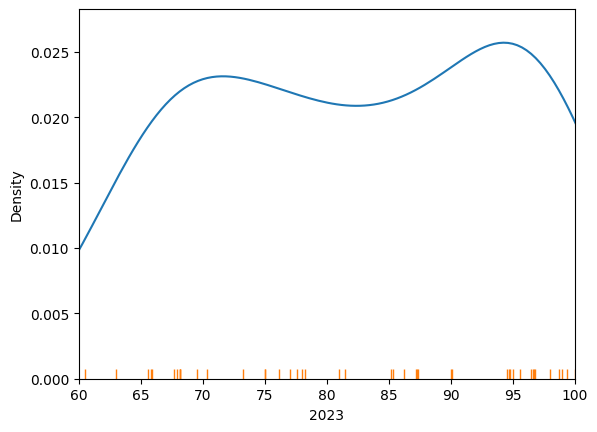

In [75]:
# Create a figure and axes
fig, ax = plt.subplots()

# Pass the same ax to both plots
sns.kdeplot(data=literacy_rate_df, x="2023", ax=ax)
sns.rugplot(data=literacy_rate_df, x="2023", ax=ax)

# data will only go to 100%, so modify?
# 60.5055503845215 is the lowest rate for which we have data
ax.set_xlim(60,100) # Set x-axis from 0 to 100??

# Violin plot

In [76]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

Text(0.5, 1.0, "Violin plot of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

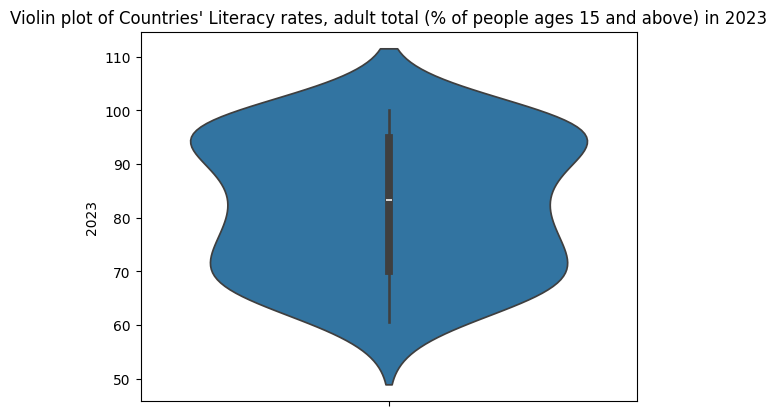

In [77]:
ax = sns.violinplot(data=literacy_rate_df, y="2023")
ax.set_title("Violin plot of Countries' Literacy rates, adult total (% of people ages 15 and above) in 2023")

# Make a 2 X 2 plot below of different visualization techniques for the literacy rates

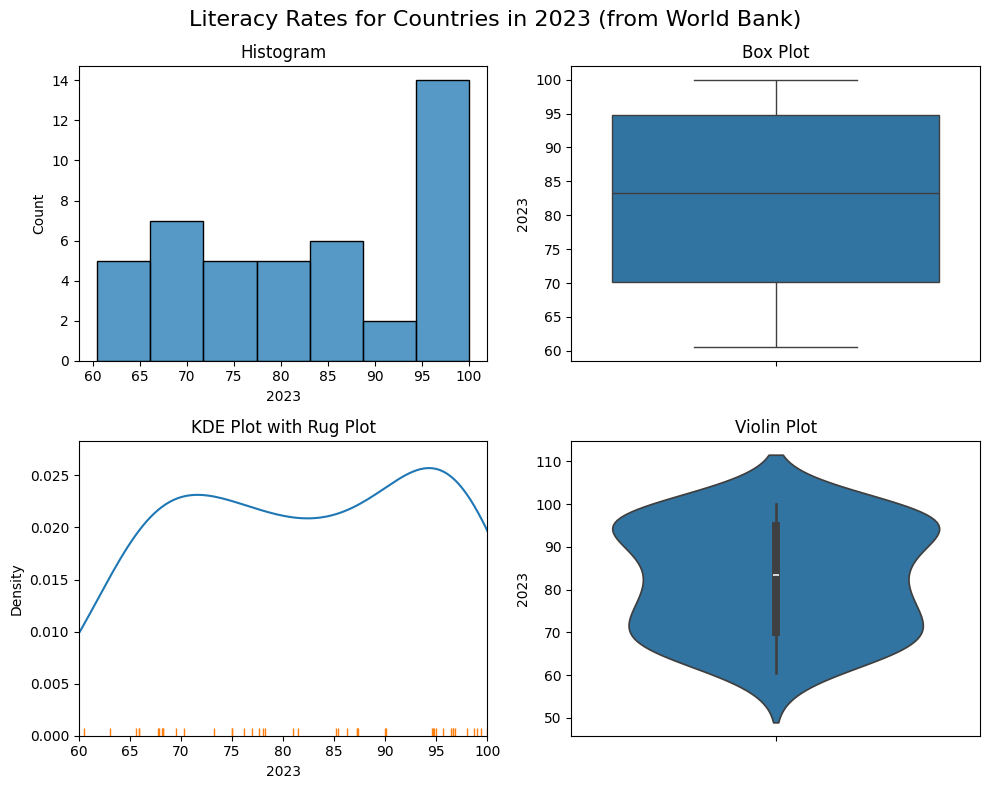

In [94]:
# fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # Create a 2x2 grid of subplots
# I'll explicitly set nrows and ncols instead of just default so I don't forget
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) # Create a 2x2 grid of subplots

# note adding in  ax=axes[x,y] will tell where to put each subplot. It will go from 0 to 1 for both x and y here
# like a coordinate system

# Plotting on each subplot

# upper left: histogram
ax = sns.histplot(data=literacy_rate_df, x="2023", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# upper right: boxplot
ax = sns.boxplot(data=literacy_rate_df, y="2023", ax=axes[0, 1])
axes[0, 1].set_title('Box Plot')

# lower left: with overlapping 2 plots on the same subplot
sns.kdeplot(data=literacy_rate_df, x="2023", ax=axes[1, 0])
sns.rugplot(data=literacy_rate_df, x="2023", ax=axes[1, 0])
axes[1, 0].set_xlim(60,100) # Set x-axis from 0 to 100??
axes[1,0].set_title('KDE Plot with Rug Plot')

# violin plot
sns.violinplot(data=literacy_rate_df, y="2023", ax=axes[1, 1])
axes[1,1].set_title("Violin Plot")

# add title for whole combined chart
fig.suptitle('Literacy Rates for Countries in 2023 (from World Bank)', fontsize=16)

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()